# Model Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_curve, auc


/Users/joemorris/opt/anaconda3/lib/python3.8/site-packages/h5py/__init__.py:72: UserWarning: h5py is running against HDF5 1.10.4 when it was built against 1.8.4, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# plotting settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14


In [3]:
# load model
model = load_model('modelCheckpoints/knock_slices_model.h5')

In [4]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               180300    
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 150)               45150     
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 dropout_8 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 150)              

In [5]:
# load history
history = pd.read_csv('modelCheckpoints/knock_slices_history.csv')

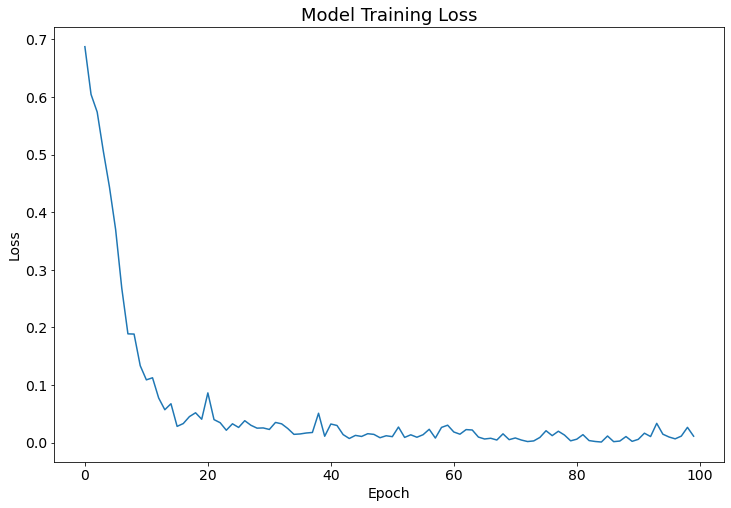

In [6]:
# plot loss
plt.plot(history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

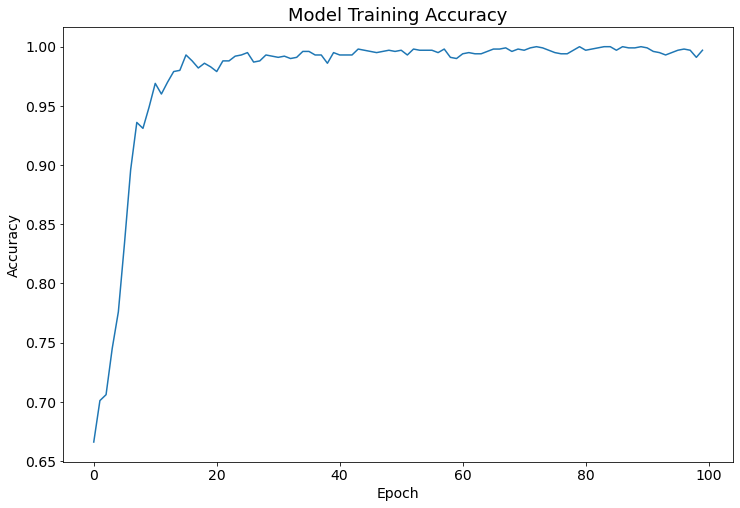

In [7]:
# plot accuracy
plt.plot(history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [8]:
validation = pd.read_csv("modelCheckpoints/knock_slices_validation.csv")

def parse_float_list(cell):
  return [float(x) for x in cell.strip('[').strip(']').split()]

validation['both_knocks'] = validation['both_knocks'].apply(parse_float_list)

validation.head()

,Unnamed: 0,filename1,filename2,label1,label2,match,knocks1,knocks2,num_slices1,num_slices2,both_knocks,len_both_knocks
0,0,sdprvpqeqb.wav,sdprvpqeqb.wav,100,100,True,[14.94531068 19.90708331 9.55300214 3.318450...,[14.94531068 19.90708331 9.55300214 3.318450...,300,300,"[14.94531068, 19.90708331, 9.55300214, 3.31845...",600
1,1,jpjcecupwp.wav,iiuanaofgh.wav,4,4,True,[4.51098823 5.7512877 2.2779568 0.87909113 0...,[7.38725903 9.07544108 3.85901112 1.69230408 0...,300,300,"[4.51098823, 5.7512877, 2.2779568, 0.87909113,...",600
2,2,oagvqxyqxz.wav,tkaorzfyzc.wav,1,1,True,[4.68712501 6.83797571 3.20446427 1.19150791 0...,[5.15004549 6.4711093 2.70183533 1.1216674 0...,300,300,"[4.68712501, 6.83797571, 3.20446427, 1.1915079...",600
3,3,iiuanaofgh.wav,jpjcecupwp.wav,4,4,True,[7.38725903 9.07544108 3.85901112 1.69230408 0...,[4.51098823 5.7512877 2.2779568 0.87909113 0...,300,300,"[7.38725903, 9.07544108, 3.85901112, 1.6923040...",600
4,4,uqvsgllfeq.wav,oagvqxyqxz.wav,1,1,True,[5.79074139 6.9896957 3.06362007 1.45585618 0...,[4.68712501 6.83797571 3.20446427 1.19150791 0...,300,300,"[5.79074139, 6.9896957, 3.06362007, 1.45585618...",600


In [9]:
model.evaluate(np.array(validation['both_knocks'].values.tolist()), np.array(validation['match'].values.tolist()))


4/4 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.9000


[0.45152705907821655, 0.8999999761581421]

### Create a confusion matrix and plot it

In [10]:
y_pred = model.predict(np.array(validation['both_knocks'].values.tolist()))
y_pred = (y_pred > .5)

cm = confusion_matrix(np.array(validation['match'].values.tolist()), y_pred)

print(cm)
print()

print('True Negatives: ', cm[0][0])
print('False Positives: ', cm[0][1])
print('False Negatives: ', cm[1][0])
print('True Positives: ', cm[1][1])

[[70  0]
 [10 20]]

True Negatives:  70
False Positives:  0
False Negatives:  10
True Positives:  20


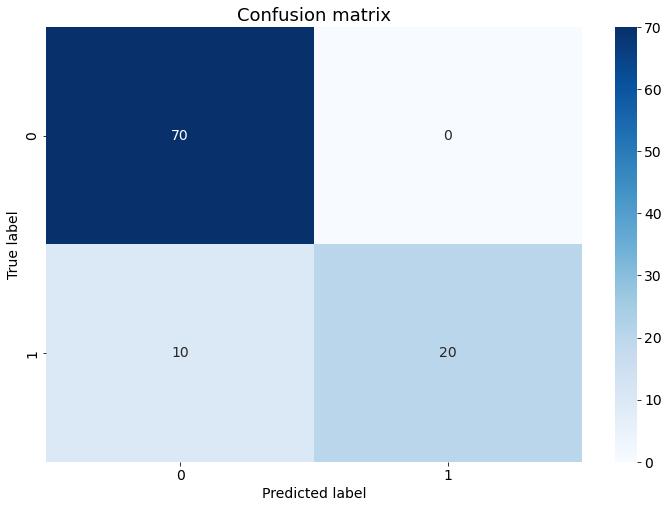

In [11]:
# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# add labels
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve

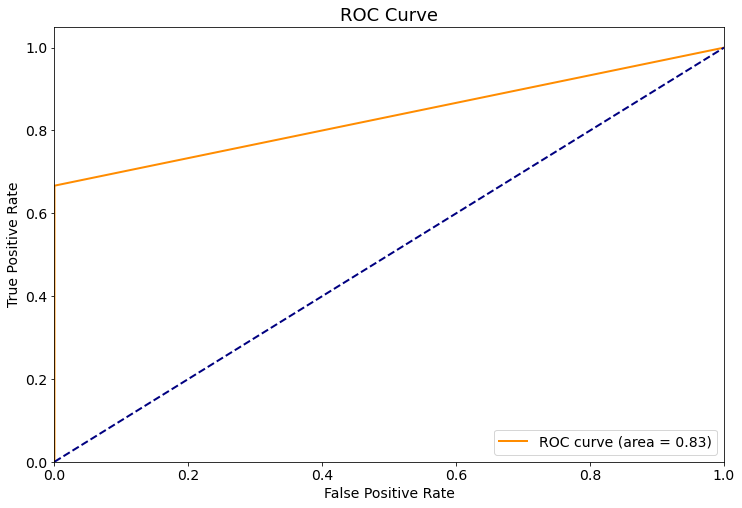

In [12]:
fpr, tpr, thresholds = roc_curve(np.array(validation['match'].values.tolist()), y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()